In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [14]:
df = pd.read_csv('data/cleaned.csv')

In [15]:
df.head()

,Unnamed: 0,case_id,submitter_id,tumor_stage,age_at_diagnosis,prior_malignancy,race,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,...,ENSG00000281903.1,ENSG00000281904.1,ENSG00000281905.1,ENSG00000281906.1,ENSG00000281909.1,ENSG00000281910.1,ENSG00000281912.1,ENSG00000281918.1,ENSG00000281920.1,ENSG00000281921.1
0,0,4d0fec97-e024-4608-a0cc-426a3decc7b1,TCGA-AR-A252_exposure,stage i,50.989041,0,white,2608.0,289.0,1661.0,...,15.0,3.0,0.0,0.0,1.0,0.0,75.0,1.0,2.0,0.0
1,1,bb8d42d3-ad65-4d88-ae1d-f9aadfc7962d,TCGA-AO-A1KS_exposure,stage iia,69.123288,0,white,5789.0,34.0,2538.0,...,41.0,1.0,0.0,0.0,5.0,1.0,24.0,0.0,2.0,0.0
2,2,c694615c-b1c6-499c-8058-995633ebf948,TCGA-E9-A1RF_exposure,stage iiia,68.819178,0,white,4544.0,1881.0,1565.0,...,26.0,3.0,0.0,0.0,0.0,0.0,16.0,1.0,3.0,0.0
3,3,c694615c-b1c6-499c-8058-995633ebf948,TCGA-E9-A1RF_exposure,stage iiia,68.819178,0,white,676.0,41.0,3732.0,...,14.0,1.0,0.0,0.0,3.0,1.0,61.0,3.0,6.0,0.0
4,4,1285eb55-415c-494a-aa58-936f0427cdd0,TCGA-V7-A7HQ_exposure,stage iiia,75.846575,0,black or african american,2299.0,5.0,708.0,...,4.0,0.0,0.0,0.0,0.0,0.0,208.0,0.0,19.0,0.0


In [16]:
df.shape

(1164, 58270)

### helper functions

In [17]:
def display_group_density_plot(df, groupby, on, palette, figsize):
    """
    Displays a density plot by group, given a continuous variable, and a group to split the data by
    :param df: DataFrame to display data from
    :param groupby: Column name by which plots would be grouped (Categorical, maximum 10 categories)
    :param on: Column name of the different density plots
    :param palette: Color palette to use for drawing
    :param figsize: Figure size
    :return: matplotlib.axes._subplots.AxesSubplot object
    """

    if not isinstance(df, pd.core.frame.DataFrame):
        raise ValueError('df must be a pandas DataFrame')

    if not groupby:
        raise ValueError('groupby parameter must be provided')

    elif not groupby in df.keys():
        raise ValueError(groupby + ' column does not exist in the given DataFrame')

    if not on:
        raise ValueError('on parameter must be provided')

    elif not on in df.keys():
        raise ValueError(on + ' column does not exist in the given DataFrame')

    if len(set(df[groupby])) > 10:
        groups = df[groupby].value_counts().index[:10]

    else:
        groups = set(df[groupby])

    # Get relevant palette
    if palette:
        palette = palette[:len(groups)]
    else:
        palette = sns.color_palette()[:len(groups)]

    # Plot
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

    for value, color in zip(groups, palette):
        sns.kdeplot(df.loc[df[groupby] == value][on], \
                    shade=True, color=color, label=value)

    ax.set_title(str("Distribution of " + on + " per " + groupby + " group"),\
                 fontsize=30)
    
    ax.set_xlabel(on, fontsize=20)
    return ax 

## Looking at some genes data

No handles with labels found to put in legend.


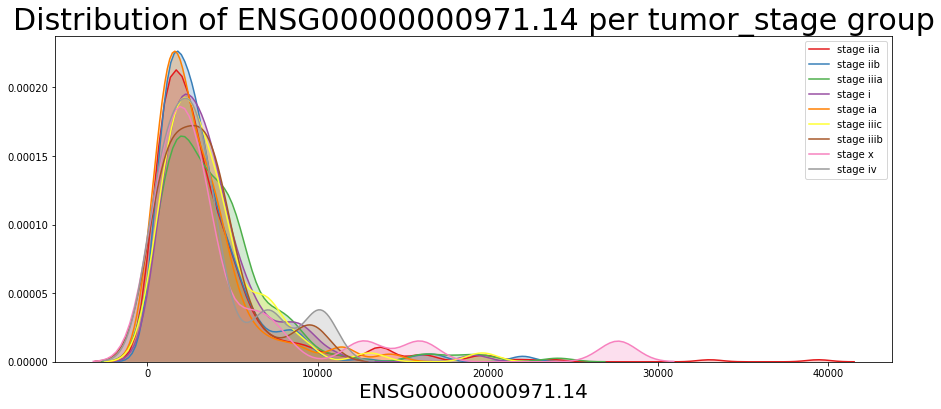

In [18]:
display_group_density_plot(groupby = 'tumor_stage', \
                           on = 'ENSG00000000971.14', \
                           df = df, \
                           figsize = (15, 6), \
                           palette = sns.color_palette('Set1'));

### Genes correlation

In order to do that, I will seperate the columns into chunks. Because my computer is not strong enough, I will do it on incongruent subsets for now:

In [ ]:
corr_to_remove = []
for i in tqdm(range(0, len(genes.columns), 1000)):
    subset = genes.iloc[:, i:i + 1000]
    corr_mat = subset.corr()
    indices = np.where((corr_mat > 0.8) | (corr_mat < -0.8))
    to_remove = [corr_mat.index[x] for x, y in zip(*indices) if x != y and x < y]
    corr_to_remove.extend(to_remove)

In [ ]:
corr_to_remove = set(corr_to_remove)
len(corr_to_remove)

In [ ]:
df = df.drop(columns=corr_to_remove)

## Looking at clinical data

In [ ]:
sns.set(style="darkgrid")

ax = sns.countplot(x = df.tumor_stage, data=df)
plt.xticks(rotation=90)
plt.show()

cat_vars = ['morphology','prior_malignancy',  'site_of_resection_or_biopsy', 'primary_diagnosis', \
            'prior_treatment', 'tissue_or_organ_of_origin', 'race', 'ethnicity']
for cat_vat in cat_vars:
    ax = sns.countplot(x = df.tumor_stage,  hue = df[cat_vat], data=df)
    plt.xticks(rotation=90)
    plt.show()

plt.scatter(clinical['prior_malignancy'], clinical['tumor_stage'])

plt.scatter(clinical['site_of_resection_or_biopsy'], clinical['tumor_stage'])


plt.scatter(clinical['icd_10_code'], clinical['tumor_stage'])

sns.stripplot(x="SaleCondition", y="SalePrice", \
              data=df_house.dropna(subset=["SaleCondition"]), \
              alpha = 0.3, jitter=False);
plt.title('Sale Price distribution by SaleCondition')

plt.show()

sns.stripplot(x="SaleCondition", y="SalePrice", \
              data=df_house.dropna(subset=["SaleCondition"]), \
              alpha = 0.3, jitter=True);
plt.title('Sale Price distribution by SaleCondition')
plt.show()


# Label


In [49]:
df['tumor_stage'].value_counts()

stage iia       378
stage iib       280
stage iiia      167
stage i          99
stage ia         88
stage iiic       68
stage iiib       27
stage iv         21
stage x          12
not reported     12
stage ii          5
stage ib          5
stage iii         2
Name: tumor_stage, dtype: int64

For the sake of this EDA, I will change the values of stages into numbers and group them into groups:

In [185]:
df['tumor_stage'] = df['tumor_stage'].replace({'stage ia': 1, 
                                               'stage ib': 1, 
                                               'stage i': 1,
                                               'stage iia': 2, 
                                               'stage iib': 2,
                                               'stage ii': 2,
                                               'stage iiia': 3,
                                               'stage iiib': 3,
                                               'stage iiic': 3,
                                               'stage iii': 3,
                                               'stage iv': 4
                                              })

I will replace the unknown values ('stage x' and 'not reported') for the mode:

In [187]:
stage_mode = df['tumor_stage'].mode().values[0]
df['tumor_stage'] = df['tumor_stage'].replace({'stage x': stage_mode,
                                               'not reported': stage_mode
                                              })

In [188]:
df['tumor_stage'].value_counts()

2    687
3    264
1    192
4     21
Name: tumor_stage, dtype: int64

In [158]:
sns.set(style="darkgrid")

In [189]:
df.head(20)

,tumor_stage,age_at_diagnosis,prior_malignancy,race_asian,race_black or african american,race_white,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,...,ENSG00000281903.1,ENSG00000281904.1,ENSG00000281905.1,ENSG00000281906.1,ENSG00000281909.1,ENSG00000281910.1,ENSG00000281912.1,ENSG00000281918.1,ENSG00000281920.1,ENSG00000281921.1
0,1,50.989041,0,0,0,1,2608.0,289.0,1661.0,2081.0,...,15.0,3.0,0.0,0.0,1.0,0.0,75.0,1.0,2.0,0.0
1,2,69.123288,0,0,0,1,5789.0,34.0,2538.0,2572.0,...,41.0,1.0,0.0,0.0,5.0,1.0,24.0,0.0,2.0,0.0
2,3,68.819178,0,0,0,1,4544.0,1881.0,1565.0,1356.0,...,26.0,3.0,0.0,0.0,0.0,0.0,16.0,1.0,3.0,0.0
3,3,68.819178,0,0,0,1,676.0,41.0,3732.0,3155.0,...,14.0,1.0,0.0,0.0,3.0,1.0,61.0,3.0,6.0,0.0
4,3,75.846575,0,0,1,0,2299.0,5.0,708.0,388.0,...,4.0,0.0,0.0,0.0,0.0,0.0,208.0,0.0,19.0,0.0
5,2,84.939726,0,0,0,1,2944.0,183.0,2030.0,2840.0,...,57.0,3.0,0.0,0.0,1.0,0.0,55.0,0.0,6.0,0.0
6,2,41.328767,0,0,0,1,1586.0,4.0,2467.0,2239.0,...,19.0,2.0,0.0,0.0,2.0,0.0,82.0,1.0,6.0,0.0
7,2,65.832877,1,0,1,0,3113.0,27.0,1608.0,2371.0,...,9.0,1.0,0.0,0.0,0.0,0.0,60.0,5.0,7.0,0.0
8,3,70.350685,0,0,0,1,1314.0,412.0,1845.0,2111.0,...,20.0,3.0,0.0,0.0,0.0,0.0,89.0,1.0,7.0,0.0
9,2,54.520548,0,0,0,1,1784.0,23.0,3378.0,2040.0,...,5.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,2.0,0.0


## Age distribution

In [191]:
df['age_at_diagnosis'].max()

90.06027397260273

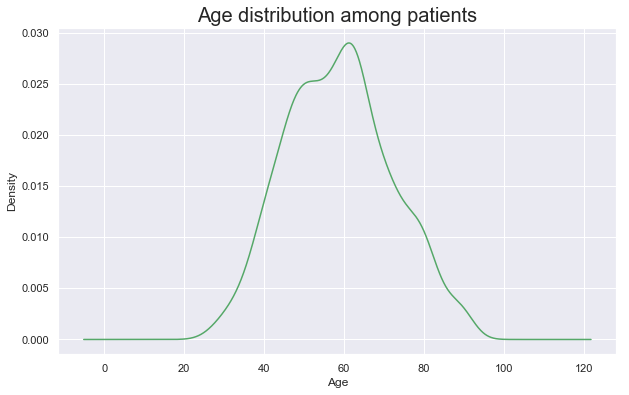

In [161]:
plt.figure(figsize = (10, 6))
df['age_at_diagnosis'].plot(kind='kde', color='g')
plt.title('Age distribution among patients', fontsize=20)
plt.xlabel('Age');

In [197]:
races = df[['race_asian','race_black or african american','race_white']][df[['race_asian','race_black or african american','race_white']]==1].stack().reset_index().drop(0,1)
races.head()

,level_0,level_1
0,0,race_white
1,1,race_white
2,2,race_white
3,3,race_white
4,4,race_black or african american


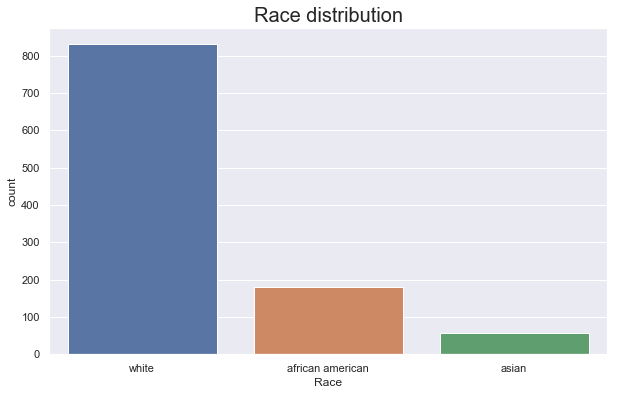

In [211]:
plt.figure(figsize = (10, 6))
sns.countplot(races['level_1'])
locs, labels = plt.xticks()
plt.xticks(locs, ['white', 'african american', 'asian'])
plt.xlabel('Race')
plt.title('Race distribution', fontsize=20);

## Genes distribution among stages

Some genes present pretty much the same pick in the distribution in different stages:

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


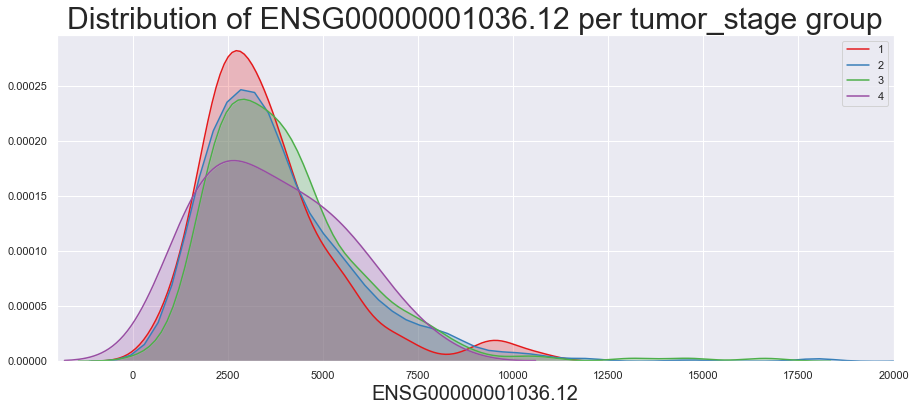

In [106]:
display_group_density_plot(groupby = 'tumor_stage', \
                           on = 'ENSG00000001036.12', \
                           df = df, \
                           figsize = (15, 6), \
                           palette = sns.color_palette('Set1'))
plt.xlim(-2000, 20000);

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


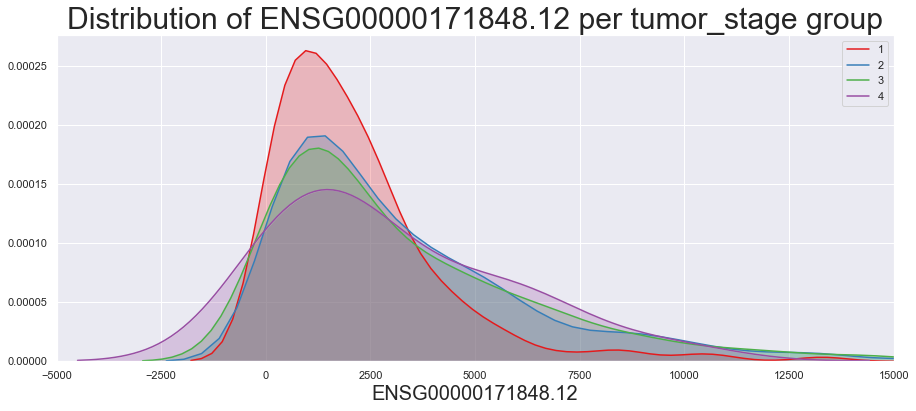

In [117]:
display_group_density_plot(groupby = 'tumor_stage', \
                           on = 'ENSG00000171848.12', \
                           df = df, \
                           figsize = (15, 6), \
                           palette = sns.color_palette('Set1'))
plt.xlim(-5000, 15000);

While others show different distrubutions:

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


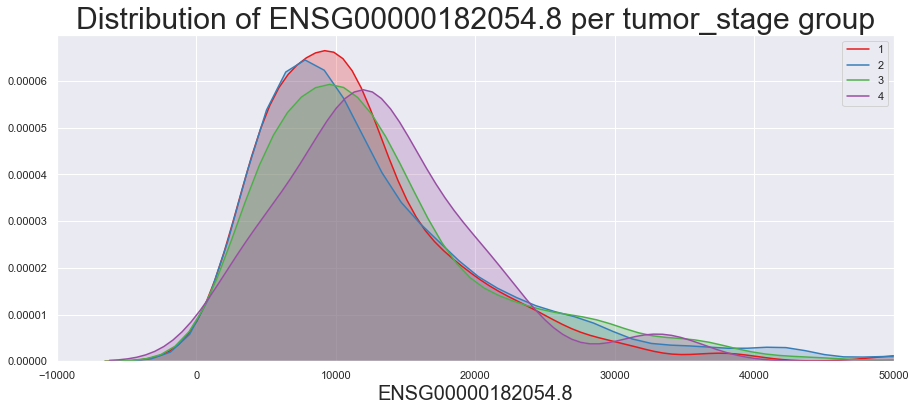

In [98]:
display_group_density_plot(groupby = 'tumor_stage', \
                           on = 'ENSG00000182054.8', \
                           df = df, \
                           figsize = (15, 6), \
                           palette = sns.color_palette('Set1'))
plt.xlim(-10000, 50000);

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


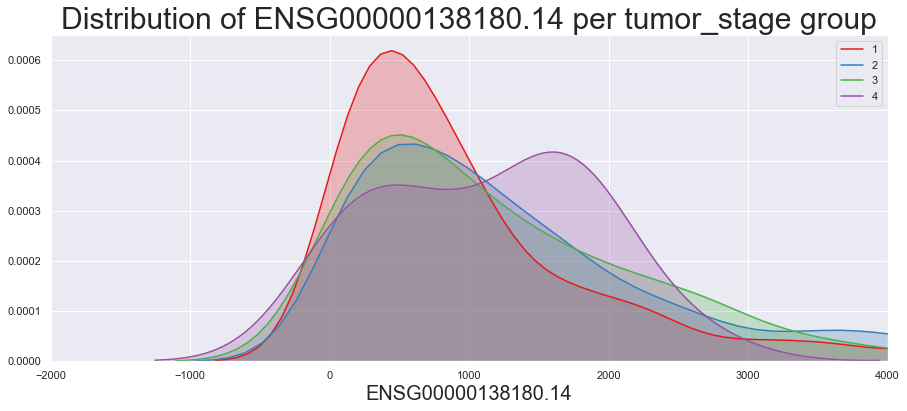

In [107]:
display_group_density_plot(groupby = 'tumor_stage', \
                           on = 'ENSG00000138180.14', \
                           df = df, \
                           figsize = (15, 6), \
                           palette = sns.color_palette('Set1'))
plt.xlim(-2000, 4000);

## Tumor stage and other features

### Count of different stages

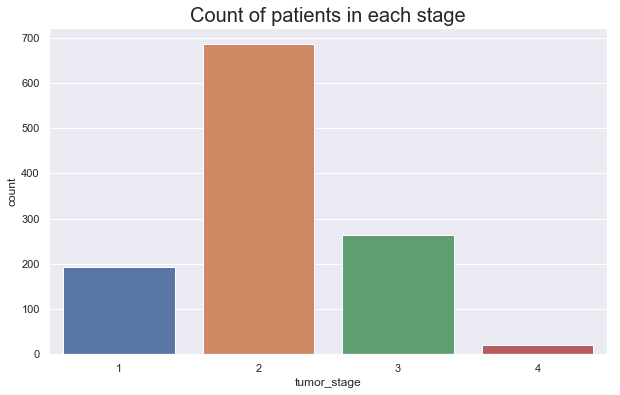

In [156]:
plt.figure(figsize = (10, 6))
sns.countplot(x = df.tumor_stage, data=df)
plt.title('Count of patients in each stage', fontsize=20)
plt.show()

## Age and tumor stage

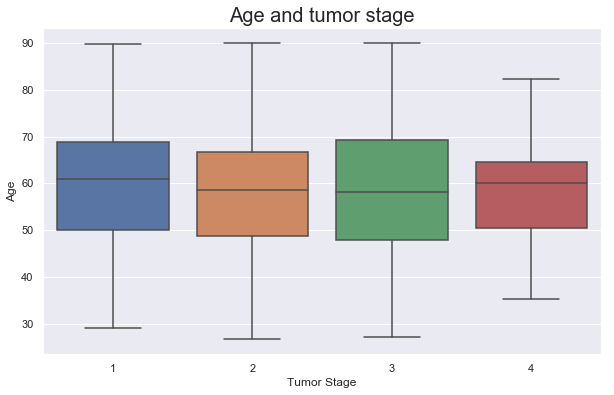

In [160]:
plt.figure(figsize = (10, 6))
sns.boxplot(y = 'age_at_diagnosis', x = 'tumor_stage', data = df)
plt.xlabel('Tumor Stage')
plt.ylabel('Age')
plt.title('Age and tumor stage', fontsize=20);

### Tumor stage and prior malignancy

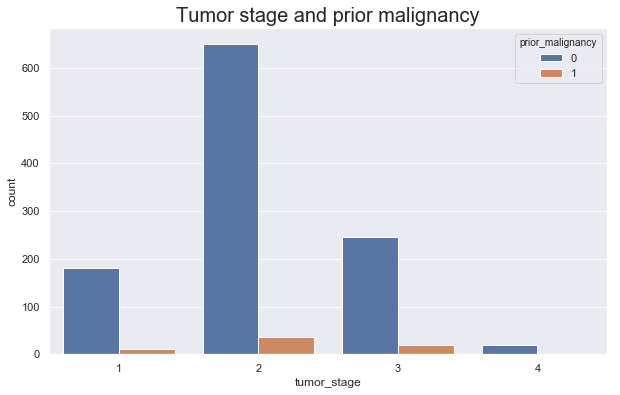

In [217]:
plt.figure(figsize = (10, 6))
plt.title('Tumor stage and prior malignancy', fontsize=20)
ax = sns.countplot(x = df.tumor_stage, hue = df['prior_malignancy'], data=df)
plt.show()

In [172]:
corr_to_remove = []
for i in tqdm(range(0, len(genes.columns), 1000)):
    subset = genes.iloc[:, i:i + 1000]
    corr_mat = subset.corr()
    indices = np.where((corr_mat > 0.8) | (corr_mat < -0.8))
    to_remove = [(corr_mat.index[x], corr_mat.columns[y], corr_mat.values[x,y]) for x, y in zip(*indices) if x != y and x < y]
    corr_to_remove.extend(to_remove)


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [01:44<00:00,  2.04s/it]

In [174]:
corr_example = pd.DataFrame(corr_to_remove, columns=['gene1', 'gene2', 'correlation'])

In [179]:
corr_example

,gene1,gene2,correlation
0,ENSG00000179626.3,ENSG00000181958.3,0.900656
1,ENSG00000184388.5,ENSG00000186288.5,0.815657
2,ENSG00000189164.13,ENSG00000197050.9,0.832539
3,ENSG00000225906.1,ENSG00000226554.1,0.833420
4,ENSG00000227528.4,ENSG00000228308.1,0.809343
5,ENSG00000227597.1,ENSG00000228291.1,0.807388
6,ENSG00000232135.1,ENSG00000233531.1,0.841749
7,ENSG00000237272.1,ENSG00000239007.1,0.807161
8,ENSG00000237471.1,ENSG00000239148.1,0.920929
9,ENSG00000238008.1,ENSG00000239035.1,0.806017


In [112]:
df.columns[df.columns.str.startswith('ENSG00000171848')]

Index(['ENSG00000171848.12'], dtype='object')